# Introduction

We provide a set of notebooks to show how the GDSCTools package can be used in ipython / ipython notebook.

The source code is available on github https://github.com/CancerRxGene/gdsctools
Would you have any issues (bug related), please fill an issue here https://github.com/CancerRxGene/gdsctools/issues

In this notebook, we will simply give a flavour of what can be done. Other notebooks will provide more detailed examples. 


Documentation is also available for users and developers in a dedicated entry page on Pypi and http://gdsctools.readthedocs.org

<hr>

<div id="content">
<p>**Other notebooks:**</p><ul id="toc"/>
<ul>
<li><a href="2. Data.ipynb">About the input data</a></li>
<li><a href="3. One Drug Analysis.ipynb">Analysis one drug only and volcano plot</a></li>
<li><a href="4. One Drug One Feature Analysis.ipynb">Analysis of one drug one feature (Association) and
boxplots</a></li>
<li><a href="5. Report.ipynb">Create HTML report</li>
<li><a href="6. Settings.ipynb">Settings of the analysis</li>
<li><a href="7. Cancer Specific Analysis.ipynb">Cancer specific analysis</li>
</ul>
</div>



### Overview

The goal of this package is to provide tools related to the GDSC project 
(Genomics of Drug Sensitivity in Cancer) http://www.cancerrxgene.org/

Currently, GSDSTools provides functionalities to identify associations between drugs and genomic features across a set of cell lines 

The genomic features are provided within the packages. Users need to provide IC50 for a set of drugs and a set of cell lines

We provide an example to play with. First let us get this IC50 test file and ad it

In [1]:
from gdsctools import ic50_test

In [2]:
print(ic50_test)

location: /home/cokelaer/Work/github/gdsctools/share/data/IC50_10drugs.tsv
description: IC50s for 10 public drugs across cell lines
authors: GDSC consortium



This is just a file with a location and description. It can be read using
the IC50 class

In [3]:
from gdsctools import IC50
data = IC50(ic50_test)
print(data)

Number of drugs: 11
Number of cell lines: 988
Percentage of NA 0.206569746043



As you can see, it contains 11 drugs across 988 cell lines

Similarly, there is a genomic feature data set provided, which can be read 
with the  GenomicFeatures class

In [4]:
from gdsctools import genomic_features, GenomicFeatures

In [5]:
gf = GenomicFeatures(genomic_features)
print(gf)

Genomic features distribution
Number of unique tissues 27
Here are the first 10 tissues: myeloma, nervous_system, soft_tissue, bone, lung_NSCLC, skin, Bladder, cervix, lung_SCLC, lung
MSI column: yes
MEDIA column: no

There are 47 unique features distributed as
- Mutation: 47
- CNA (gain): 0
- CNA (loss): 0


This file is going to be downloaded automatically when an analysis 
is performed. However, you may provide your own file.

Let us now perform the analysis using the ANOVA class

In [6]:
from gdsctools import ANOVA

In [7]:
an = ANOVA(data, genomic_features=genomic_features.filename)

TISSUE FACTOR : included
MEDIA FACTOR : NOT included
MSI FACTOR : included
FEATURE FACTOR : included


In [8]:
print(an)

Number of drugs: 11
Number of cell lines: 988
Percentage of NA 0.206569746043

Genomic features distribution
Number of unique tissues 27
Here are the first 10 tissues: lung_NSCLC, prostate, stomach, nervous_system, skin, Bladder, leukemia, kidney, thyroid, soft_tissue
MSI column: yes
MEDIA column: no

There are 47 unique features distributed as
- Mutation: 47
- CNA (gain): 0
- CNA (loss): 0


so, we have 11 drugs, 677 features across 988 cell lines (27 tissues). This 
is a PANCAN analysis (across several cancer cell types).

We can analysis the entire data set, which takes some time (still reasonable; about 1 minute dependiing on your system). 

In [9]:
results = an.anova_all()

 [-----------------100%-----------------] 11 of 11 complete in 4.0 sec



All results are now in the new variable <b>results</b>, which can be looked at. This is a dataframe formatted variable using Pandas library. Each association can be accessed to using a unique identifier from 0 to the length of the dataframe:

In [10]:
results.df.ix[0]

ASSOC_ID                                 1
FEATURE                           TP53_mut
DRUG_ID                     Drug_1047_IC50
DRUG_NAME                              NaN
DRUG_TARGET                            NaN
N_FEATURE_neg                          292
N_FEATURE_pos                          554
FEATURE_pos_logIC50_MEAN           4.06932
FEATURE_neg_logIC50_MEAN           2.49511
FEATURE_delta_MEAN_IC50            1.57421
FEATURE_IC50_effect_size           1.39063
FEATURE_neg_Glass_delta            1.09839
FEATURE_pos_Glass_delta            1.68301
FEATURE_neg_IC50_sd                 1.4332
FEATURE_pos_IC50_sd               0.935351
FEATURE_IC50_T_pval            1.27218e-68
ANOVA_FEATURE_pval             1.57507e-58
ANOVA_TISSUE_pval              5.54188e-44
ANOVA_MSI_pval                   0.0259029
ANOVA_MEDIA_pval                       NaN
ANOVA_FEATURE_FDR              8.03288e-54
Name: 0, dtype: object

As an example, we can plot the histogram of the FDR columns:

Populating the interactive namespace from numpy and matplotlib


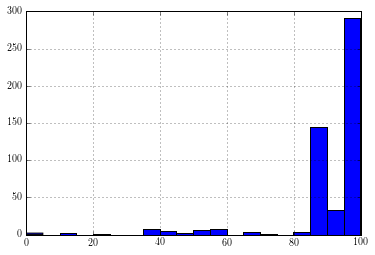

In [12]:
%pylab inline
results.df['ANOVA_FEATURE_FDR'].hist(bins=20)

In the next notebooks, we will now investigate more precisely 
- the input data sets
- the analysis and in particular how to look at
    - one association
    - associations for a given drug
    - all associations (what we did here when we called anova_all() function)
- How to generate HTML reports
- The settings
    

<hr>
<ht>
**Author: Thomas Cokelaer, Nov 2015**